Machine Learning Model Project: Likelihood of Life Satisfaction Based on Predictors

Group 2:
Katie Bouey // Amber Jackson // Gabriel Orosco

ISDS 7070, James Davis

In Partial Consideration for MSA Analytics,

Louisiana State University

Firstly, it is important to import the relevant libraries into the notebook. Nicnaming the libraries with abbreviations saves us time and effort in the long run, and makes the program run more efficiently as it will be less cluttered.

In [1]:
# basic, wrangling and plots imports
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
# ML models imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
# Classification model imports
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

Now, we import the data using .read_csv(), skipping row 1 (the column headers), and manually assigning new names to the columns that will not interfere with our table.

In [2]:
# Importing the dataset
DATASET_COLUMNS = ["RELEASENUMBER","familyid","hhsize","age","lifesatis","dwellingunit","ownhome","employmnt","salaryamnt","owncar",
                   "numbercars","ownbusiness","healthins","collegeeduc","highlifesatis","age2","logage","worknow",
                   "retired"]
DATASET_ENCODING = "ISO-8859-1"
# Import dataset into URL // dataset was published to make easier to use the jupyther notebook or any shared tool to work this project
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vTNo3TD9qWimyTsi0Z_Ccm3Xje0CLp9Dq-RiV7qHCG5HHwlpljlzyMsQU2dsb_lEx63x1tiU37vxDxP/pub?gid=170987029&single=true&output=csv"

#read the csv file and use encoding to proper set-up, skipping first row and using columns to make sure the columns are correct
df = pd.read_csv(url, encoding=DATASET_ENCODING, skiprows=1, names=DATASET_COLUMNS)

Lets take a look at that data. We are going to use the .tail() feature.
There are 9607 entries on this dataset!
Our data types seem to be:1. INT: RELEASENUMBER, familyid, hhsize, age, dwellingunit, numbercars, age2.  2.dummy variabiles that are also INT: lifestatis, ownhome, employmnt, owncar, ownbusiness, healthins, collegeeduc, highlifesatis, worknow, retired. 3. float: salaryamnt, logage.

In [3]:
# print the lower sample of the dataset
df.tail(10)

,RELEASENUMBER,familyid,hhsize,age,lifesatis,dwellingunit,ownhome,employmnt,salaryamnt,owncar,numbercars,ownbusiness,healthins,collegeeduc,highlifesatis,age2,logage,worknow,retired
9597,2,2695,2,58,2,3,0,4,0.0,1,2,0,1,0,1,58,4.060443,0,1
9598,2,7541,3,56,1,1,1,1,0.0,1,1,1,1,0,1,56,4.025352,1,0
9599,2,8674,7,73,0,1,1,4,0.0,1,3,0,1,0,0,73,4.290460,0,1
9600,2,9074,2,26,3,3,0,1,0.0,1,1,0,1,0,0,26,3.258097,1,0
9601,2,4657,5,27,1,1,0,1,47000.0,1,2,0,1,1,1,27,3.295837,1,0
9602,2,4245,1,59,4,3,0,1,4352.0,0,0,0,1,0,0,59,4.077538,1,0
9603,2,8251,2,55,4,2,1,1,54000.0,1,1,0,1,0,0,55,4.007333,1,0
9604,2,8040,2,29,3,3,0,3,0.0,1,1,0,1,0,0,29,3.367296,0,0
9605,2,7718,7,31,1,1,1,1,2500.0,1,4,0,1,0,1,31,3.433987,1,0
9606,2,5120,4,37,2,1,1,1,0.0,1,2,0,1,1,1,37,3.610918,1,0


Lets compare the expected data type with the cast data types using the .info() feature. It seems that none of our data has been cast different than anticipated. It also looks like we dont have any Nulls to wrangle or pesky objects cluttering our data to replace, which is lovely and convenient.

In [4]:
# checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RELEASENUMBER  9607 non-null   int64  
 1   familyid       9607 non-null   int64  
 2   hhsize         9607 non-null   int64  
 3   age            9607 non-null   int64  
 4   lifesatis      9607 non-null   int64  
 5   dwellingunit   9607 non-null   int64  
 6   ownhome        9607 non-null   int64  
 7   employmnt      9607 non-null   int64  
 8   salaryamnt     9607 non-null   float64
 9   owncar         9607 non-null   int64  
 10  numbercars     9607 non-null   int64  
 11  ownbusiness    9607 non-null   int64  
 12  healthins      9607 non-null   int64  
 13  collegeeduc    9607 non-null   int64  
 14  highlifesatis  9607 non-null   int64  
 15  age2           9607 non-null   int64  
 16  logage         9607 non-null   float64
 17  worknow        9607 non-null   int64  
 18  retired 

Now we look at the relevant statistics for each column using the .describe() feature. It looks as though the RELEASENUMBER, familyid may not be relevant statistics. But we decide to keep familyid as it could be useful as an unique identifier. We do not, however, include it in our analysis.

In [5]:
# relevant statistics on the the unwrangled data
df.describe()

,RELEASENUMBER,familyid,hhsize,age,lifesatis,dwellingunit,ownhome,employmnt,salaryamnt,owncar,numbercars,ownbusiness,healthins,collegeeduc,highlifesatis,age2,logage,worknow,retired
count,9607.0,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9.607000e+03,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000
mean,2.0,4825.911523,2.602061,46.401790,2.180910,1.814927,0.501926,2.037369,1.297975e+05,0.846882,1.637035,0.086499,0.917664,0.215260,0.643177,45.904236,3.762182,0.694494,0.146456
std,0.0,2787.413326,1.526696,27.267372,0.946386,1.265624,0.500022,2.730058,1.063272e+06,0.360119,1.811527,0.281115,0.274890,0.411024,0.479087,16.460148,0.361180,0.460646,0.353581
min,2.0,1.000000,1.000000,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2.890372,0.000000,0.000000
25%,2.0,2414.500000,1.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,32.000000,3.465736,0.000000,0.000000
50%,2.0,4826.000000,2.000000,43.000000,2.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,43.000000,3.761200,1.000000,0.000000
75%,2.0,7236.500000,4.000000,58.000000,3.000000,3.000000,1.000000,3.000000,0.000000e+00,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,58.000000,4.060443,1.000000,0.000000
max,2.0,9656.000000,16.000000,999.000000,9.000000,7.000000,1.000000,99.000000,9.999999e+06,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,101.000000,4.615120,1.000000,1.000000


Interesting Observation: no results for lifesatis 6 or 7. Therefore anyone who rated themselveds less than a little unsatisfactorilly, rated completely unsatisfactorally.

Query: What is the most common result for lifesatis? Where 0 is the highest possible life satisfaction and 9 is the lowest possible life satisfaction.

In [6]:
# determine the unique values of 'lifesatis' in ascending order and check for the most frequent number
uniquearray=np.sort(df['lifesatis'].unique())
mode0_lifesatis=df['lifesatis'].mode()[0]
print("Unique values lifesatis:", uniquearray)
print("most frequent number: ", mode0_lifesatis)

Unique values lifesatis: [0 1 2 3 4 5 8 9]
most frequent number:  2


Although we will be displaying models for analysis using both lifesatis and highlifesatis, the target for the machine learning is to predict highlifesatis.

In [7]:
# creating a target variable and listing how many times each value appreared for the target variable
target = 'lifesatis'
print("Value counts:\n",df[target].value_counts(),"\n")
print("Describe target:\n",df[target].describe())

Value counts:
 2    4150
3    2847
1    2029
4     325
0     122
5     100
8      24
9      10
Name: lifesatis, dtype: int64 

Describe target:
 count    9607.000000
mean        2.180910
std         0.946386
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: lifesatis, dtype: float64


We want to detect outliers to check for typos, data that may beed to be excluded from our analysis, and data that may be relevant to our analysls.

In [8]:
# Start the wrangling phase of the project
# Define a function to detect outliers using the IQR method with an increased fence size

def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

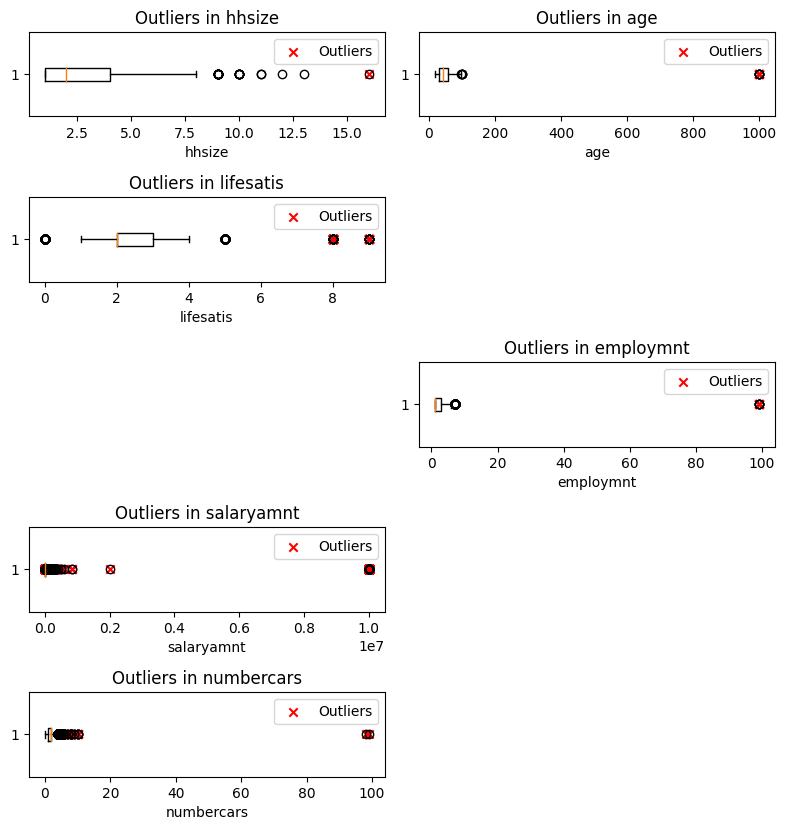

In [9]:
# Create an empty list to receive the outlier plots
outlier_plots = []

# Number of columns in the grid predefined to 2 for easy to use / analyse
num_cols = 2
# Calculate the number of rows needed
num_rows = (len(df.columns) - 1) // num_cols + 1

# Set the figure size (multiple attempts to get a size)
plt.figure(figsize=(8, 16))
for i, column in enumerate(df.columns):
# Only consider columns with more than 2 unique values (non-binary columns)
    if df[column].nunique() > 2:
        outliers = detect_outliers(df[column])
        if not outliers.empty:
            plt.subplot(num_rows, num_cols, i + 1)
            plt.boxplot(df[column], vert=False)
            plt.scatter(outliers, [1] * len(outliers), color='r', marker='x', label='Outliers')
            plt.title(f'Outliers in {column}')
            plt.xlabel(column)
            plt.legend(loc='best')

# Adjust the layout to avoid overlapping of subplots (not working as intended)
plt.tight_layout()
plt.show()
# Figure 1

In [10]:
# Dictionary to store outliers for each variable
outlier_dict = {}

# Detect and store outliers for each non-binary variable
for column in df.columns:
    # Exclude 'salaryamnt' due to high variance and consider only non-binary columns
    if column != 'salaryamnt' and df[column].nunique() > 2:
        outliers = detect_outliers(df[column])
        if not outliers.empty:
            outlier_dict[column] = outliers.tolist()

# Print the unique outliers
for column, outliers in outlier_dict.items():
    print(f"Unique outliers in {column}: {list(set(outliers))}")

Unique outliers in hhsize: [16]
Unique outliers in age: [999]
Unique outliers in lifesatis: [8, 9]
Unique outliers in employmnt: [99]
Unique outliers in numbercars: [98, 99, 6, 7, 8, 9, 10]


In [11]:
# deeper look into the hhzise to determine what to wrangle
print("Value counts:\n",np.sort(df['hhsize'].unique()),"\n")
print("Value counts:\n",df['hhsize'].value_counts(),"\n")

Value counts:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 16] 

Value counts:
 2     2991
1     2584
3     1557
4     1353
5      677
6      271
7      107
8       39
9       16
10       7
11       2
13       1
12       1
16       1
Name: hhsize, dtype: int64 



In [12]:
#replacing outliers for null to later replace nulls for the most frequent number in the set (inplace)
df['employmnt'].replace(99, np.nan, inplace = True)
df['numbercars'].replace([99,98], np.nan, inplace = True)
df['salaryamnt'].replace([9999999.0,9999998.0], np.nan, inplace = True)
df['hhsize'].replace([11,12,13,16], np.nan, inplace = True)

# Columns to exclude
columns_to_exclude = ["age","RELEASENUMBER","familyid", "logage"]
new_df = df.drop(columns=columns_to_exclude)

# rename age2 (wrangled age) to age inplace
new_df.rename(columns={'age2':'age'}, inplace=True)

In [13]:
# replace the null values for the most frequent number
for column in new_df.columns:
    if new_df[column].dtype != "object":
        most_frequent_mode = new_df[column].mode()[0]
        new_df[column].fillna(most_frequent_mode, inplace=True)

In [14]:
# Bins to group ages
age_bins = [17, 26, 42, 58, 69, 101]
age_labels = ['Gen Z','Millennial', 'Baby Boomers', 'Silent Generation', 'Greatest generation']
new_df['generation'] = pd.cut(new_df['age'], bins=age_bins, labels=age_labels)

# Bins to group ages in a numeric output
age_num_labels = ['1','2', '3', '4', '5']
new_df['numeric_generation'] = pd.cut(new_df['age'], bins=age_bins, labels=age_num_labels)

# Cast 'numeric_generation' as int
new_df['numeric_generation'] = new_df['numeric_generation'].astype(int)

In [15]:
new_df.head(15)

,hhsize,lifesatis,dwellingunit,ownhome,employmnt,salaryamnt,owncar,numbercars,ownbusiness,healthins,collegeeduc,highlifesatis,age,worknow,retired,generation,numeric_generation
0,1.0,2,3,0,5.0,0.0,1,1.0,0,1,0,1,59,0,0,Silent Generation,4
1,1.0,2,1,1,1.0,0.0,1,3.0,0,1,0,1,57,1,0,Baby Boomers,3
2,1.0,3,3,0,5.0,0.0,0,0.0,0,1,0,0,43,0,0,Baby Boomers,3
3,1.0,3,1,0,1.0,0.0,1,1.0,1,0,0,0,42,1,0,Millennial,2
4,4.0,3,2,0,1.0,0.0,1,1.0,0,1,0,0,27,1,0,Millennial,2
5,2.0,1,2,0,1.0,0.0,0,0.0,0,0,0,1,27,1,0,Millennial,2
6,2.0,2,3,0,6.0,0.0,1,1.0,0,1,0,1,25,0,0,Gen Z,1
7,5.0,1,3,0,3.0,0.0,1,1.0,0,1,0,1,35,0,0,Millennial,2
8,2.0,2,1,0,1.0,0.0,1,2.0,0,1,0,1,34,1,0,Millennial,2
9,3.0,1,1,1,1.0,0.0,1,3.0,0,1,0,1,55,1,0,Baby Boomers,3


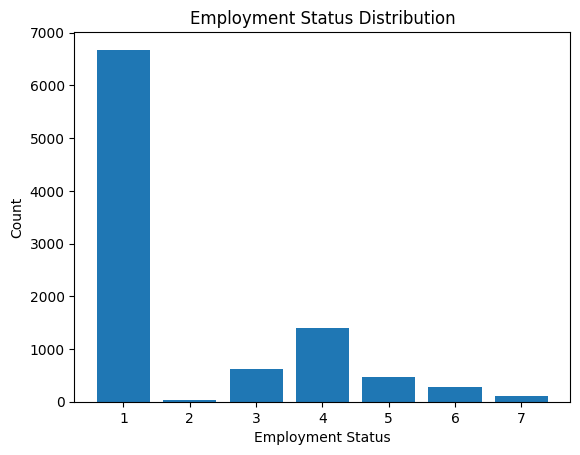

In [16]:
# Employment status distribution
employment_counts = new_df['employmnt'].value_counts()
plt.bar(employment_counts.index, employment_counts.values)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status Distribution')
plt.show()
# Figure 2

In [17]:
# Future work
# double check the avg lifesatis for employmnt ==1 vs employmnt > 1
# this will tell if the variable is usefull for the model or not

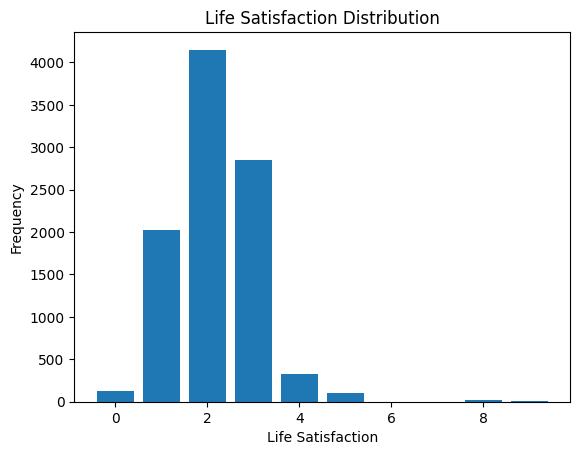

In [18]:
# Life Satisfaction distribution
lifesatis_counts = new_df['lifesatis'].value_counts()
plt.bar(lifesatis_counts.index, lifesatis_counts.values)
plt.xlabel('Life Satisfaction')
plt.ylabel('Frequency')
plt.title('Life Satisfaction Distribution')
plt.show()
# Figure 3

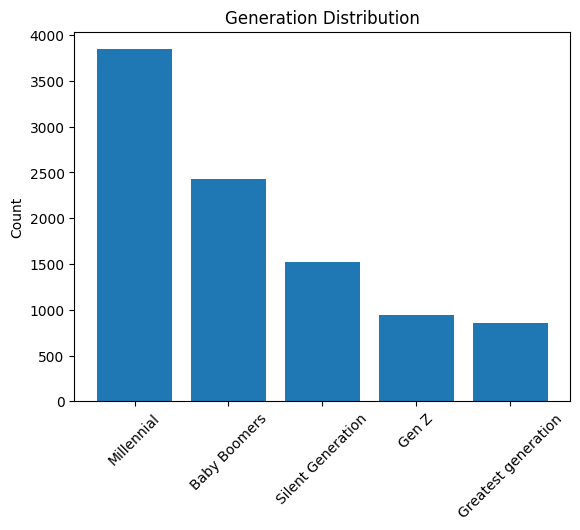

In [19]:
# Generation status distribution
generation_counts = new_df['generation'].value_counts()
plt.bar(generation_counts.index, generation_counts.values)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Generation Distribution')
plt.show()
# Figure 4

In [20]:
freq_generation = new_df.groupby(['lifesatis','generation']).size().unstack(fill_value=0)
freq_generation.head(10)

generation,Gen Z,Millennial,Baby Boomers,Silent Generation,Greatest generation
lifesatis,,,,,
0,1,12,23,22,64
1,199,796,511,342,181
2,367,1648,1068,700,367
3,337,1212,710,384,204
4,34,125,87,54,25
5,7,41,24,18,10
8,1,7,4,4,8
9,1,3,4,1,1


In [21]:
freq_satis = new_df.groupby(['highlifesatis', 'lifesatis']).size().unstack(fill_value=0)
print(freq_satis)

lifesatis        0     1     2     3    4    5   8   9
highlifesatis                                         
0              122     0     0  2847  325  100  24  10
1                0  2029  4150     0    0    0   0   0


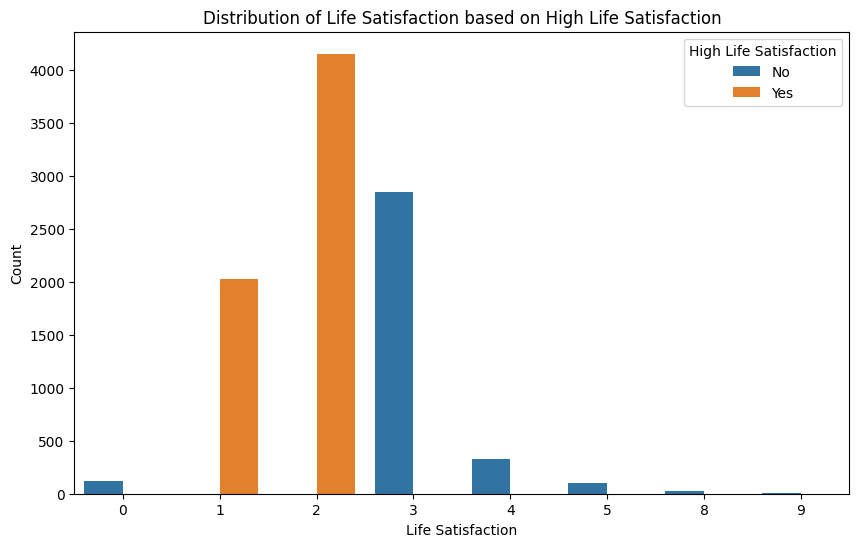

In [22]:
# Plot of lifesatis vs highlifesatis
plt.figure(figsize=(10, 6))
sns.countplot(x='lifesatis', hue='highlifesatis', data=new_df)
plt.xlabel('Life Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Life Satisfaction based on High Life Satisfaction')
plt.legend(title='High Life Satisfaction', labels=['No', 'Yes'])
plt.show()
# Figure 5

In [23]:
# create a dictionary to replace the values of 'lifesatis' to the opposite orientation
lifesatis_dic = {
    0: 9,
    1: 8,
    2: 7,
    3: 6,
    4: 5,
    5: 2,
    8: 1,
    9: 0}

# replacing the variable inplace using the dictionary
new_df['lifesatis'] = new_df['lifesatis'].replace(lifesatis_dic)

In [24]:
# looking the correlation of 'highlifesatis' and 'lifesatis' after the change
freq_satis2 = new_df.groupby(['highlifesatis', 'lifesatis']).size().unstack(fill_value=0)
print(freq_satis2)

lifesatis       0   1    2    5     6     7     8    9
highlifesatis                                         
0              10  24  100  325  2847     0     0  122
1               0   0    0    0     0  4150  2029    0


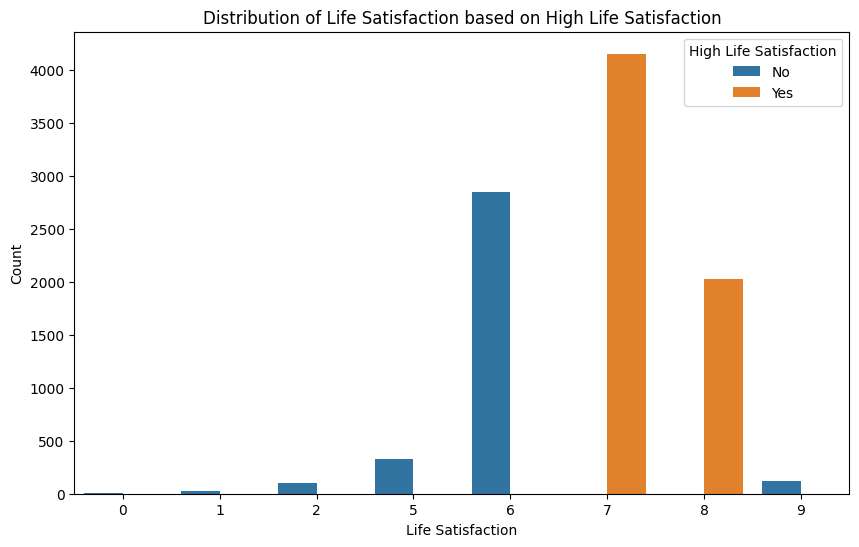

In [25]:
# Plot of lifesatis vs highlifesatis after the change
plt.figure(figsize=(10, 6))
sns.countplot(x='lifesatis', hue='highlifesatis', data=new_df)
plt.xlabel('Life Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Life Satisfaction based on High Life Satisfaction')
plt.legend(title='High Life Satisfaction', labels=['No', 'Yes'])
plt.show()
# Figure 6

In [26]:
# analysing 'lifesatis' vs 'generation'
freq_age = new_df.groupby(['lifesatis','generation']).size().unstack(fill_value=0)
freq_age.head(10)

generation,Gen Z,Millennial,Baby Boomers,Silent Generation,Greatest generation
lifesatis,,,,,
0,1,3,4,1,1
1,1,7,4,4,8
2,7,41,24,18,10
5,34,125,87,54,25
6,337,1212,710,384,204
7,367,1648,1068,700,367
8,199,796,511,342,181
9,1,12,23,22,64


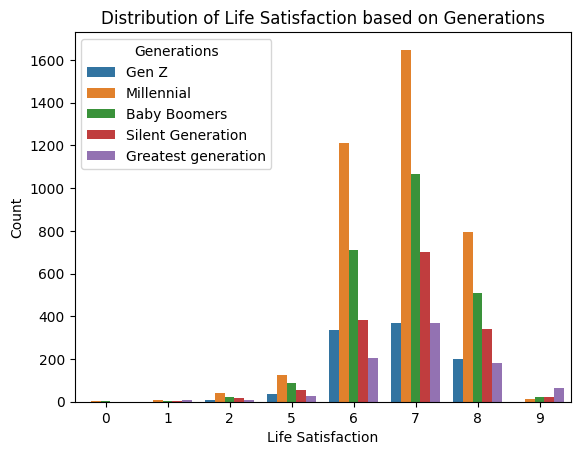

In [27]:
# Plot of lifesatis vs generations
sns.countplot(x='lifesatis', hue='generation', data=new_df)
plt.xlabel('Life Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Life Satisfaction based on Generations')
plt.legend(title='Generations')

plt.show()
# Figure 7

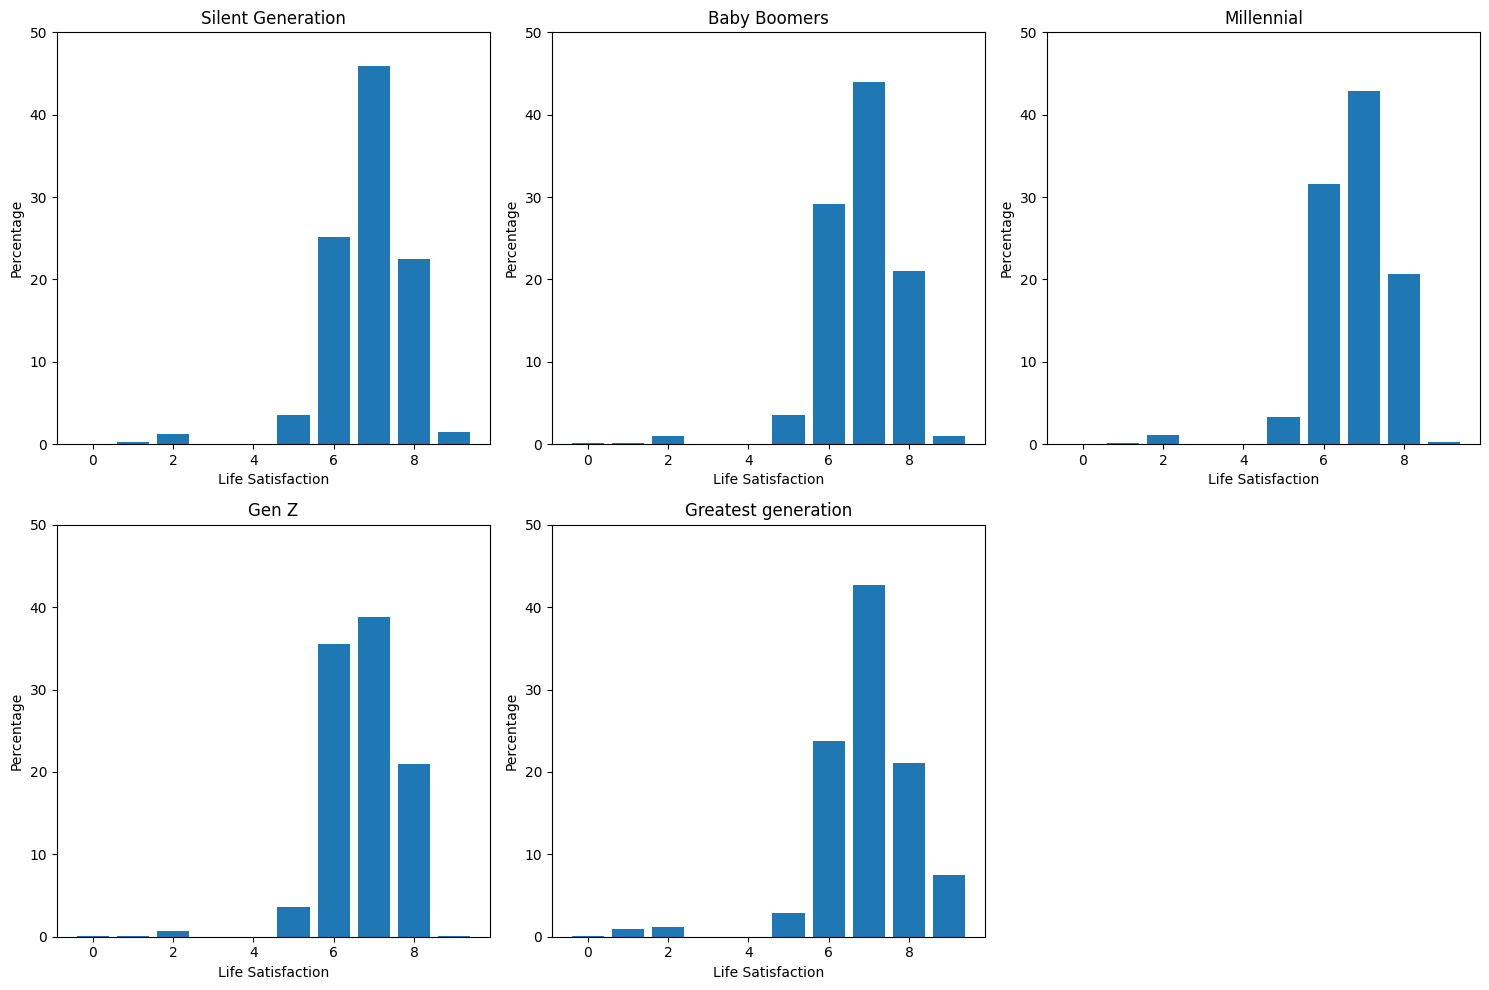

In [28]:
# Calculate percentage distribution of lifesatis for each generation
perc_dist = new_df.groupby('generation')['lifesatis'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# define the total number for the loop
gen = new_df['generation'].unique()

# define plot size
fig = plt.figure(figsize=(15, 10))

#loop for create one graph for each generation having lifesatis as X axis and percentage of that generation in the Y axis
for i, gen in enumerate(gen, start=1):
    data = perc_dist[perc_dist['generation'] == gen]
    # cheat code to prevent creating an empty plot
    if i <= 6:
        plt.subplot(2, 3, i)
        plt.bar(data['lifesatis'], data['percentage'])
        plt.title(f'{gen}')
        plt.xlabel('Life Satisfaction')
        plt.ylabel('Percentage')
        # Set the y-axis limit to ensure consistent scaling since it looks well distributed it can top off at the half of the percentage total range
        plt.ylim(0, 50)

plt.tight_layout()
plt.show()
# Figure 8

Query: What is the dispersion of life satisfaction by age?
Observations on Range based on current model:

*   There seems to be a similar general spread of life satifaction for all age groups with life satisfaction between 0-5 where the majority of our data lies.
*   The subgroup that claims to be the happiest tends to be a bit older.
*   The spread for number 5, which is less than perceived 'median life satisfaction' (4.5), has a smaller range than the others in the main cluster. Therefore the youngest and oldest participants were less likely to rate their lifesatisfaction negatively.
*   Compared to their peers, the subgroup of participants between their mid 40s to mid 50s are less likely to rate themselves a 0 (perfect life satisfaction) and also less likely to rate themselves a 5 or below (poor life satisfaction). The stats of this data range could be an interesting query.
*   Compared to their peers, the subgroups of participants 18-20 and 18-25 are also much less likely to rate themselves a 0 or 5 and below.

Weighing the dots by size or transparency to represent how many times that particular point appeared in the data set were also insightful. Unfortunately the cells were frustratingly slow to load. Therefore we screenshot the results but deleted them from the notebook for efficiency. The weighted diagrams can be seen in the presentation.

Another idea would be to weigh not by direct count but by percent the count is out of the whole age. I'm afraid that would be even slower.





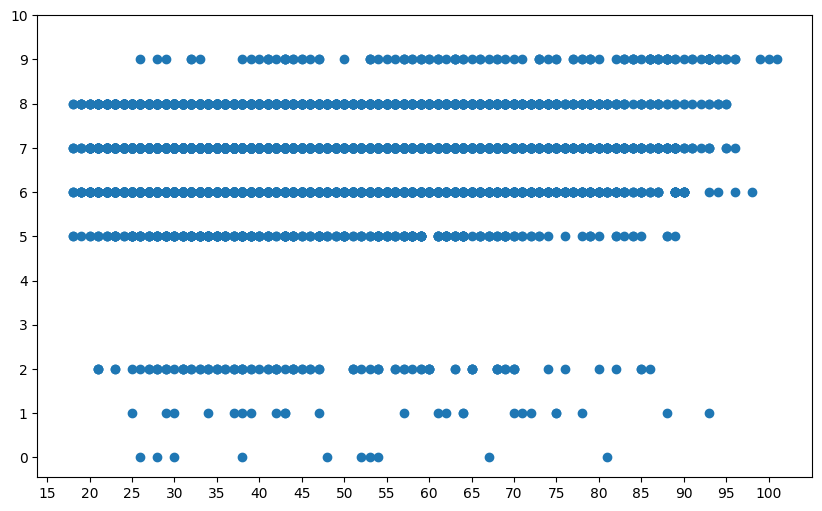

In [29]:
#define the size of the graph
plt.figure(figsize=(10, 6))
# make data
x = new_df['age']
y = new_df['lifesatis']
# plot
plt.scatter(x,y)
plt.xticks(np.arange(15, 105, 5))
plt.yticks(np.arange(0, 11, 1))

plt.show()
# Figure 9

Here we hypothesize that the data was likely originally intended to predict home ownership. We inspect the correlations of the variables more closely with their original purpose in mind. Although this data was not originally intended for the purpose of predicting life satisfaction, we wondered if we could use the data in a new way, to predict life satisfaction.

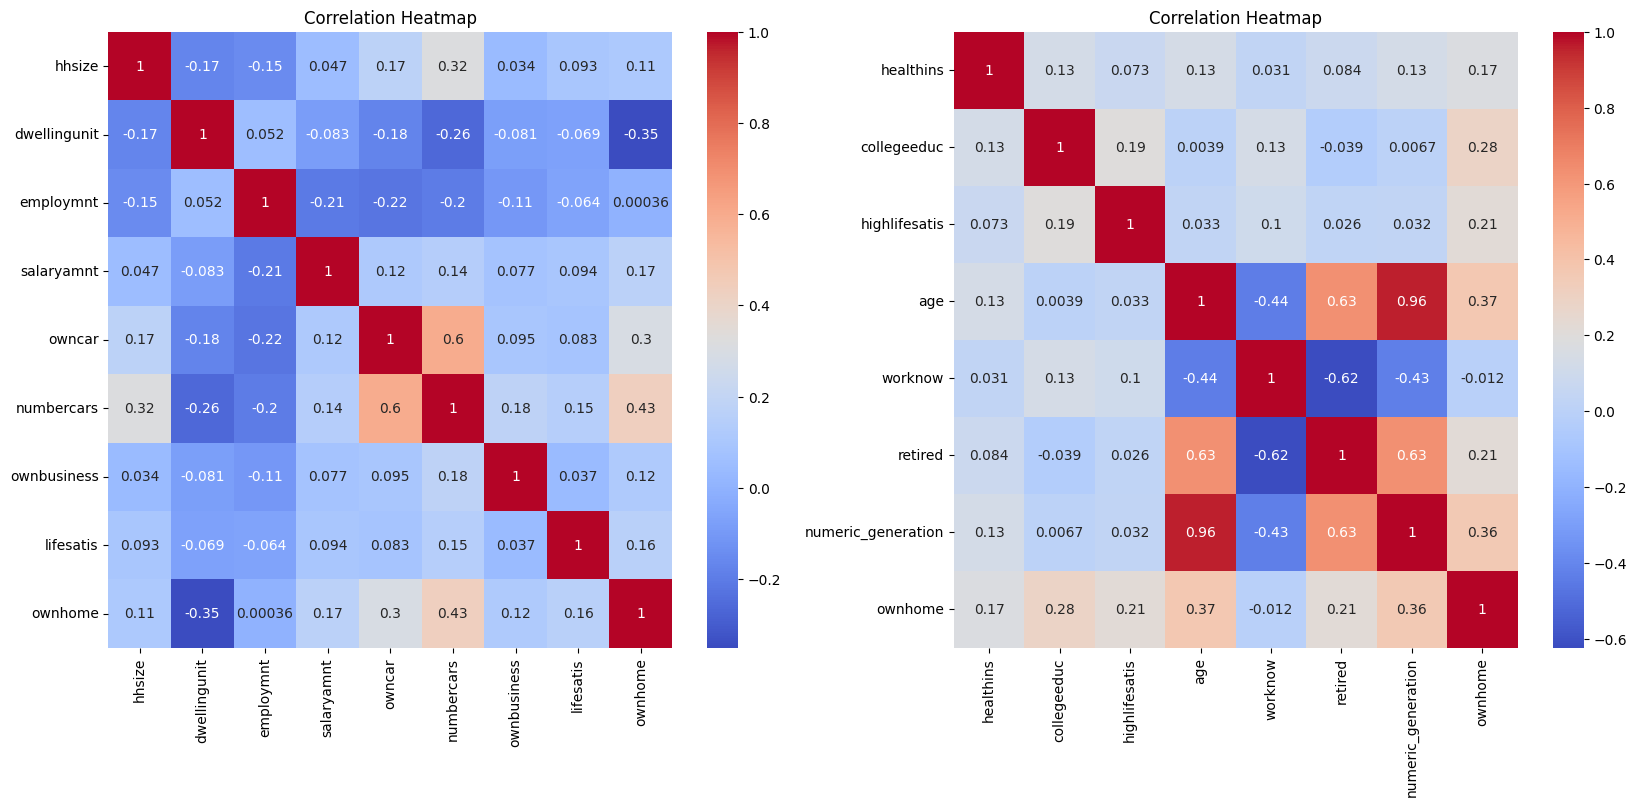

In [30]:
# Correlation heatmap different variables against lifesatis
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
correlation_matrix1 = new_df[['hhsize','dwellingunit'  , 'employmnt', 'salaryamnt', 'owncar','numbercars','ownbusiness','lifesatis', 'ownhome']].corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Correlation heatmap different variables against lifesatis
plt.subplot(1,2,2)
correlation_matrix1 = new_df[['healthins','collegeeduc' , 'highlifesatis' , 'age', 'worknow', 'retired','numeric_generation','ownhome']].corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()
# Figure 10

Here we review over the correlations between our predictors. Our focus is on life satisfaction so we include it in both diagrams.

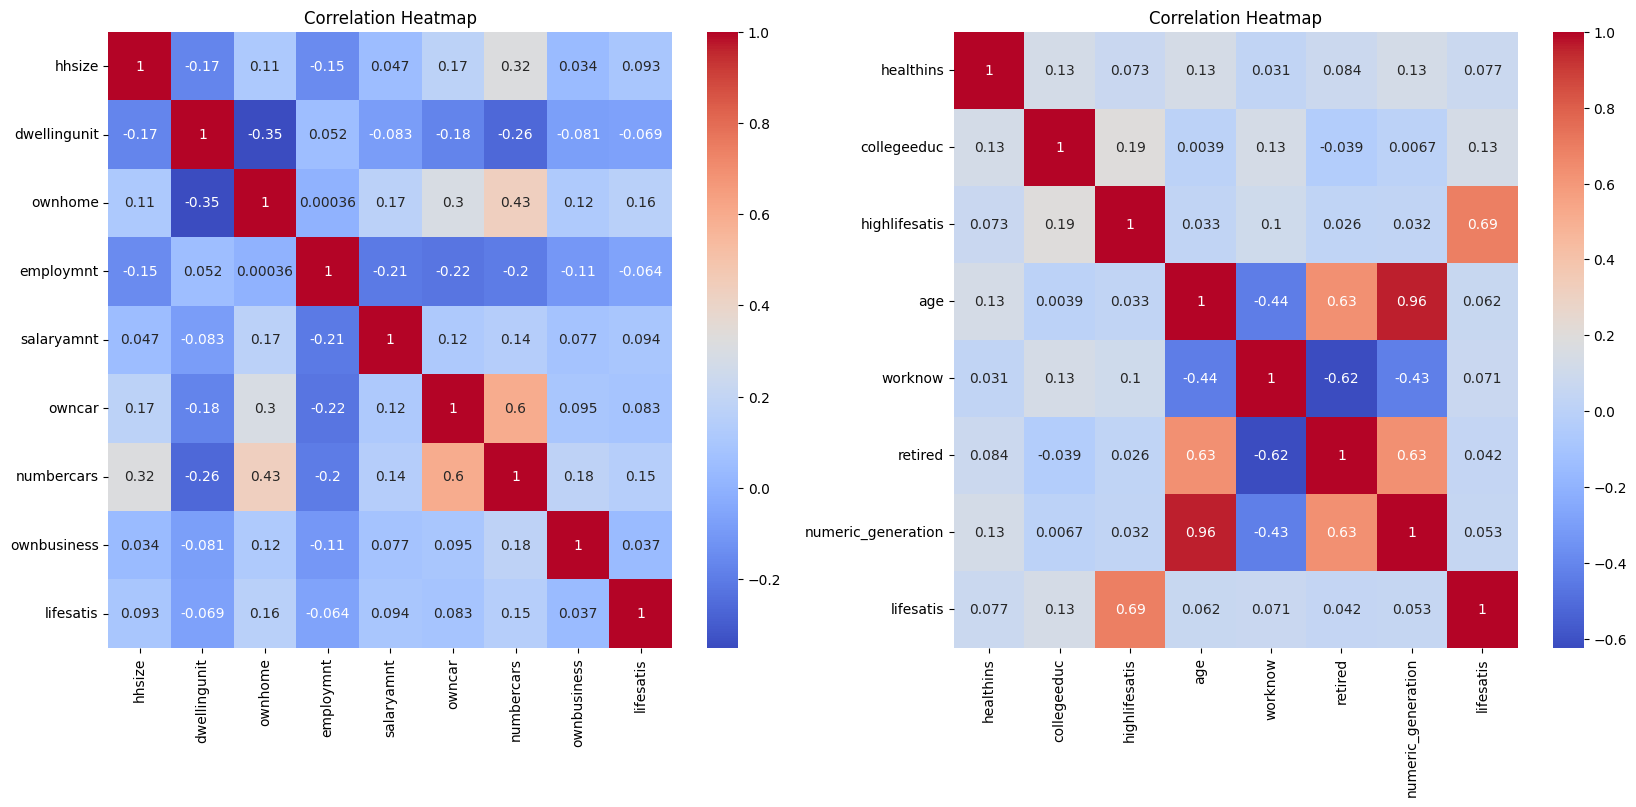

In [31]:
# Correlation heatmap different variables against lifesatis
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
correlation_matrix1 = new_df[['hhsize','dwellingunit'  , 'ownhome', 'employmnt', 'salaryamnt', 'owncar','numbercars','ownbusiness','lifesatis']].corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Correlation heatmap different variables against lifesatis
plt.subplot(1,2,2)
correlation_matrix1 = new_df[['healthins','collegeeduc' , 'highlifesatis' , 'age', 'worknow', 'retired','numeric_generation','lifesatis']].corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Figure 11

 Project Checklist Roadmap: Train multiple models from different categories
(linear, naïve Bayes, SVM, Random Forest)

In choosing which models we would leverage for this second part of the final assignment, we choose to eliminate the Linear model as an option due to the fact that the variables we are using have a non-linear distribution.

We attempted to leverage the Naive model; however, in creating the model we discovered it generated an unworthy prediction (.12 accuracy according to tests) which helps us eliminates this as a valuable model as well for our data. This would be helpful if our data was binary or if our data was sorted in different sample sizes. This is more helpful for analyzing our data, not ideal for prediction.  

The best models that could be leveraged with our variables is the SVM and Random Forest models. The SVM model was successful for our data because we received more than 40%, which is approximately four times better than the Naive model. This is a common model and normally very useful to analyze how the data is distributed and the ease of prediction.

The Random Forest model is a supervised Machine Learning algorithm. This algorithm creates a set of decision trees from a few randomly selected subsets of the training set and picks predictions from each tree. Then by means of voting, the random forest algorithm selects the best solution. As it was applied to our dataset, we can determine that some of our predictors carry a high importance percentage and should be used in future calculations. We will use this model to eliminate the non-important variables to then rerun the SVM and Random Forest models and see if our percentages increase.

In [32]:
# Separate features X and target variable Y
# removing 'generation' to avoid categorical variable on the random forest model
X = new_df.drop(['lifesatis', 'generation'], axis=1)
y = new_df['lifesatis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

In [33]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=84)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy.round(4))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions,zero_division=1))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

#Get feature importances for Random Forest
feature_importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
print("Random Forest Feature Importances:")
print(feature_importances_rf)

Random Forest Accuracy: 0.6826
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       1.00      0.00      0.00         5
           2       0.17      0.04      0.06        25
           5       0.10      0.03      0.05        66
           6       0.84      0.96      0.90       571
           7       0.68      0.79      0.73       816
           8       0.39      0.27      0.31       410
           9       0.64      0.27      0.38        26

    accuracy                           0.68      1922
   macro avg       0.60      0.29      0.30      1922
weighted avg       0.64      0.68      0.65      1922

Random Forest Confusion Matrix:
[[  0   0   0   0   2   0   0   1]
 [  0   0   0   0   5   0   0   0]
 [  0   0   1   1  23   0   0   0]
 [  0   0   0   2  63   0   0   1]
 [  0   0   4  14 551   0   0   2]
 [  0   0   0   0   0 642 174   0]
 [  0   0   0   0   0 301 109   0]
 [  

In [34]:
# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=84)
rf_regressor.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf_predictions = rf_regressor.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("Random Forest R-squared:", rf_r2.round(4))
print("Random Forest MSE:", rf_mse.round(4))

Random Forest R-squared: 0.4263
Random Forest MSE: 0.6598


In [35]:
# Train the Naive Bayes model
X_train_nb = X_train.copy()
X_test_nb = X_test.copy()

label_encoder = LabelEncoder()
for col in X_train_nb.columns:
    if X_train_nb[col].dtype == 'object':
        X_train_nb[col] = label_encoder.fit_transform(X_train_nb[col])
        X_test_nb[col] = label_encoder.transform(X_test_nb[col])

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train)

# Evaluate the Naive Bayes model
nb_predictions = nb_model.predict(X_test_nb)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Naive Bayes Accuracy:", nb_accuracy.round(4))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions,zero_division=1))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))

# Get coefficients for Naive Bayes
coefficients_nb = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': nb_model.theta_[0]})
print("Naive Bayes Coefficients:")
print(coefficients_nb)

Naive Bayes Accuracy: 0.1332
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         3
           1       1.00      0.00      0.00         5
           2       1.00      0.00      0.00        25
           5       1.00      0.00      0.00        66
           6       0.59      0.06      0.11       571
           7       0.59      0.24      0.34       816
           8       0.31      0.04      0.07       410
           9       0.47      0.35      0.40        26

    accuracy                           0.13      1922
   macro avg       0.62      0.21      0.12      1922
weighted avg       0.55      0.13      0.20      1922

Naive Bayes Confusion Matrix:
[[  3   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0]
 [ 24   0   0   0   0   1   0   0]
 [ 61   0   0   0   2   3   0   0]
 [478   0   0   0  33  51   7   2]
 [570   0   0   0  16 194  29   7]
 [307   0   0   0   5  80  17   1]
 [ 15   0 

The SVM model would not perform well using a linear kernel (would have overloaded resources) so the variables were not specifically called out like in the Random Forest examples.

In [36]:
X_train_svm = X_train.copy()
X_test_svm = X_test.copy()

label_encoder = LabelEncoder()
for col in X_train_svm.columns:
    if X_train_svm[col].dtype == 'object':
        X_train_svm[col] = label_encoder.fit_transform(X_train_svm[col])
        X_test_svm[col] = label_encoder.transform(X_test_svm[col])

svm_model = SVC(random_state=84)
svm_model.fit(X_train_svm, y_train)

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test_svm)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy.round(4))
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions,zero_division=1))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Accuracy: 0.4251
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       1.00      0.00      0.00         5
           2       1.00      0.00      0.00        25
           5       1.00      0.00      0.00        66
           6       1.00      0.00      0.00       571
           7       0.42      1.00      0.60       816
           8       1.00      0.00      0.00       410
           9       1.00      0.00      0.00        26

    accuracy                           0.43      1922
   macro avg       0.93      0.13      0.08      1922
weighted avg       0.76      0.43      0.25      1922

SVM Confusion Matrix:
[[  0   0   0   0   0   3   0   0]
 [  0   0   0   0   0   5   0   0]
 [  0   0   0   0   0  25   0   0]
 [  0   0   0   0   0  66   0   0]
 [  0   0   0   0   0 571   0   0]
 [  0   0   0   0   0 816   0   0]
 [  0   0   0   0   0 409   1   0]
 [  0   0   0   0   0  26   0   0]

In [37]:
# Train the SVM Regressor
svm_regressor = SVR()
svm_regressor.fit(X_train_svm, y_train)

# Evaluate the SVM Regressor
svm_predictions = svm_regressor.predict(X_test_svm)
svm_r2 = r2_score(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

print("SVM R-squared:", svm_r2.round(4))
print("SVM MSE:", svm_mse.round(4))

SVM R-squared: -0.0082
SVM MSE: 1.1596


To help improve the accuracy of our results, we have removed the following variables: Own Business, Own Home, Own Cars, Work Now, and Retired. Once removed, we reran the SVM and Random Forest models to determine if our prediction percentages increased.

Within the new Random Forest example, we were able to achieve the same effect (70%) while having less predicators included. This gives us better accuracy with a reduced model than leveraging the full model. Lastly, this contributed to us being able to identify insignificant variables which had a significant change to our outcome.

Because the accuracy of Naive model was not significant, we decided to not leverage the R2 factors of the predictor because they would not provide valuable input for our model. Within the new SVM example, we were also able to achieve the same effect, however, this indicates there was an error in our code. Further investigation is required to determine our next steps.

In [38]:
# Separate features X and target variable Y
# removing 'generation' to avoid categorical variable on the random forest model
X = new_df.drop(['lifesatis', 'generation','worknow','retired','owncar','ownbusiness','ownhome'], axis=1)
y = new_df['lifesatis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=84)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
new_rf_predictions = rf_model.predict(X_test)
new_rf_accuracy = accuracy_score(y_test, new_rf_predictions)

print("Random Forest Accuracy:", new_rf_accuracy.round(4))
print("Random Forest Classification Report:")
print(classification_report(y_test, new_rf_predictions,zero_division=1))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, new_rf_predictions))

#Get feature importances for Random Forest
new_model_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
print("Random Forest Feature Importances:")
print(new_model_rf)

Random Forest Accuracy: 0.6842
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       1.00      0.00      0.00         5
           2       0.14      0.04      0.06        25
           5       0.06      0.02      0.02        66
           6       0.83      0.96      0.89       571
           7       0.69      0.78      0.73       816
           8       0.40      0.29      0.34       410
           9       0.64      0.27      0.38        26

    accuracy                           0.68      1922
   macro avg       0.59      0.29      0.30      1922
weighted avg       0.64      0.68      0.65      1922

Random Forest Confusion Matrix:
[[  0   0   0   0   3   0   0   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   1   2  22   0   0   0]
 [  0   0   0   1  65   0   0   0]
 [  0   0   5  14 548   0   0   4]
 [  0   0   0   0   0 640 176   0]
 [  0   0   0   0   0 292 118   0]
 [  

In [39]:
# Train the Random Forest Regressor
new_rf_regressor = RandomForestRegressor(random_state=84)
new_rf_regressor.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
new_rf_r2 = r2_score(y_test, new_rf_predictions)
new_rf_mse = mean_squared_error(y_test, new_rf_predictions)

print("Random Forest R-squared:", new_rf_r2.round(4))
print("Random Forest MSE:", new_rf_mse.round(4))

Random Forest R-squared: 0.3287
Random Forest MSE: 0.7721


In [40]:
X_train_svm = X_train.copy()
X_test_svm = X_test.copy()

label_encoder = LabelEncoder()
for col in X_train_svm.columns:
    if X_train_svm[col].dtype == 'object':
        X_train_svm[col] = label_encoder.fit_transform(X_train_svm[col])
        X_test_svm[col] = label_encoder.transform(X_test_svm[col])

svm_model = SVC(random_state=84)
svm_model.fit(X_train_svm, y_train)

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test_svm)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy.round(4))
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions,zero_division=1))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Accuracy: 0.4251
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       1.00      0.00      0.00         5
           2       1.00      0.00      0.00        25
           5       1.00      0.00      0.00        66
           6       1.00      0.00      0.00       571
           7       0.42      1.00      0.60       816
           8       1.00      0.00      0.00       410
           9       1.00      0.00      0.00        26

    accuracy                           0.43      1922
   macro avg       0.93      0.13      0.08      1922
weighted avg       0.76      0.43      0.25      1922

SVM Confusion Matrix:
[[  0   0   0   0   0   3   0   0]
 [  0   0   0   0   0   5   0   0]
 [  0   0   0   0   0  25   0   0]
 [  0   0   0   0   0  66   0   0]
 [  0   0   0   0   0 571   0   0]
 [  0   0   0   0   0 816   0   0]
 [  0   0   0   0   0 409   1   0]
 [  0   0   0   0   0  26   0   0]

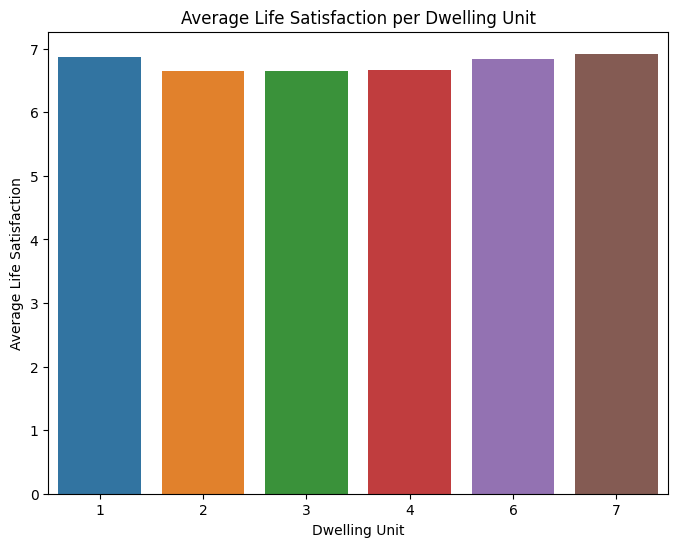

In [41]:
# there is no difference in average life satisfaction for low  to high dwelling units.
#Therefore dropping the dwelling unit variable is justifiable as it contributes nothing
#to our data

# Group by "dwellingunit" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("dwellingunit")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("Dwelling Unit")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Dwelling Unit")
plt.show()

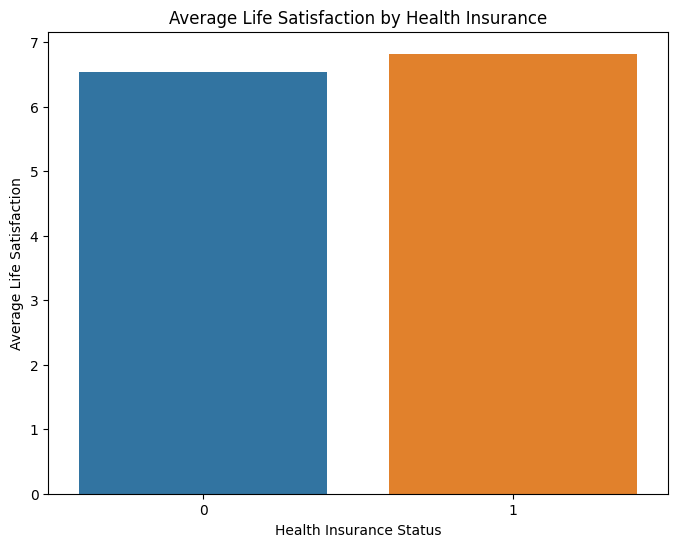

In [42]:
# Group by "healthins" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("healthins")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("Health Insurance Status")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction by Health Insurance")
plt.show()

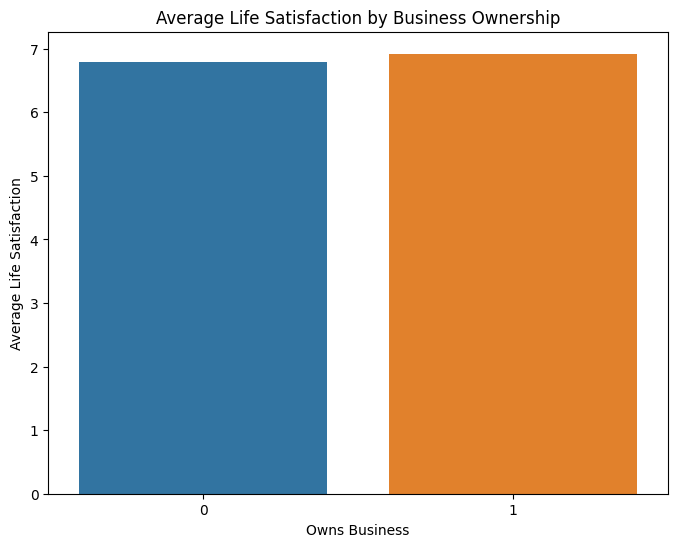

In [43]:
# Group by "ownbusiness" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("ownbusiness")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("Owns Business")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction by Business Ownership")
plt.show()

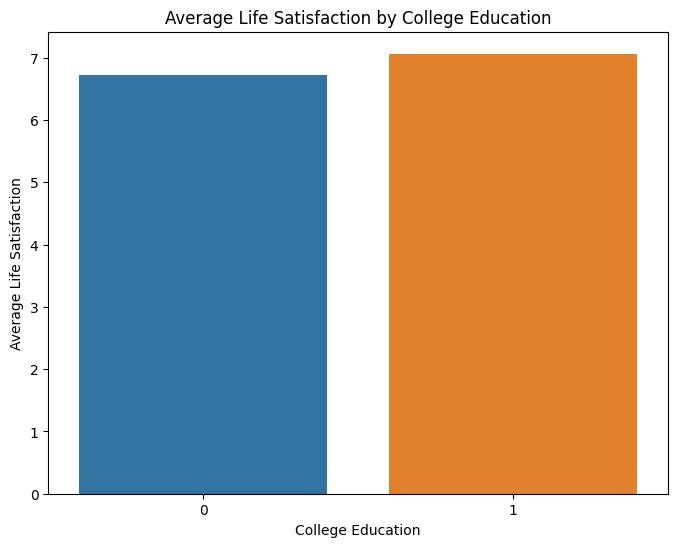

In [44]:
# Group by "collededuc" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("collegeeduc")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("College Education")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction by College Education")
plt.show()

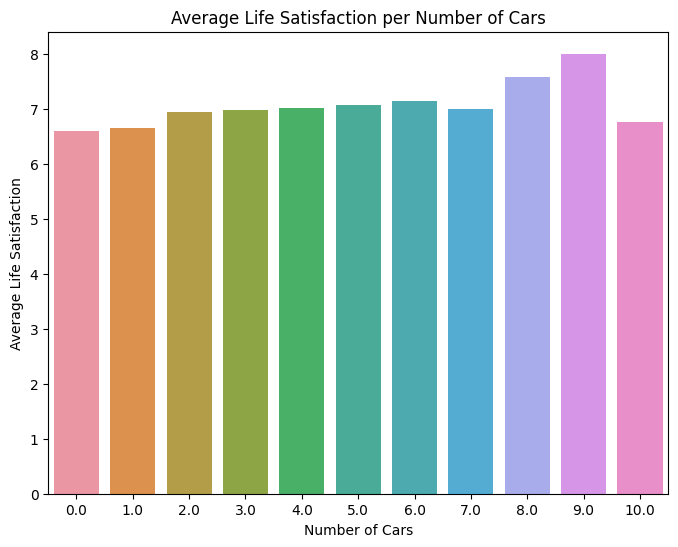

In [45]:
#since high life satis is rated as 7 or 8 this would be a relevant predictor as
#having 0,1, or 10 cars could reduce likelihood of high life satisfaction

# Group by "number of cars" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("numbercars")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("Number of Cars")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Number of Cars")
plt.show()

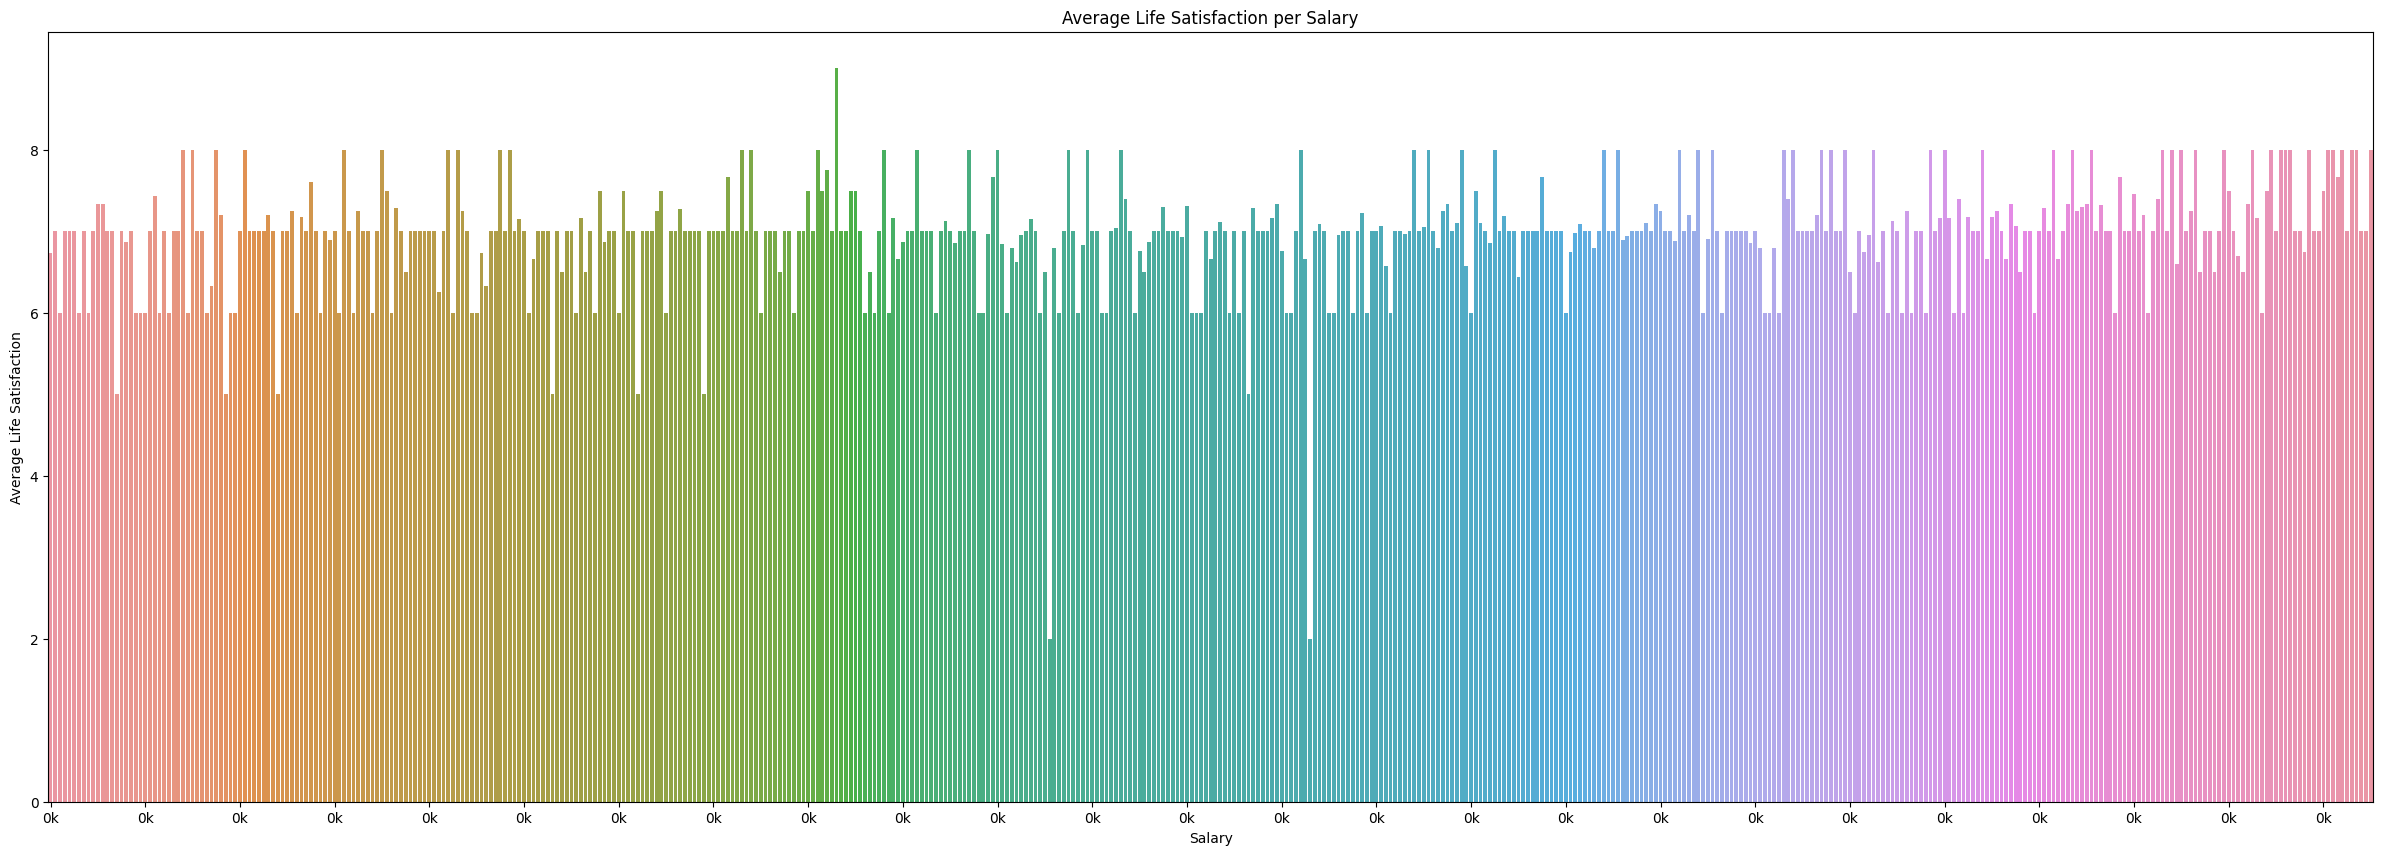

In [46]:
#finally some variability! this fluctuates in almost cyclic kind of pattern.
#i would like to see salary benchmarks better

# Group by "salaryamnt" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("salaryamnt")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(30, 10))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)

# Set custom x-axis ticks with labels representing salary benchmarks in increments of 10,000s
plt.xticks(ticks=np.arange(0, len(average_lifesatis.index), step=20),
           labels=[f"{x/10000:.0f}k" for x in average_lifesatis.index[:25]])

plt.xlabel("Salary")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Salary")
plt.show()

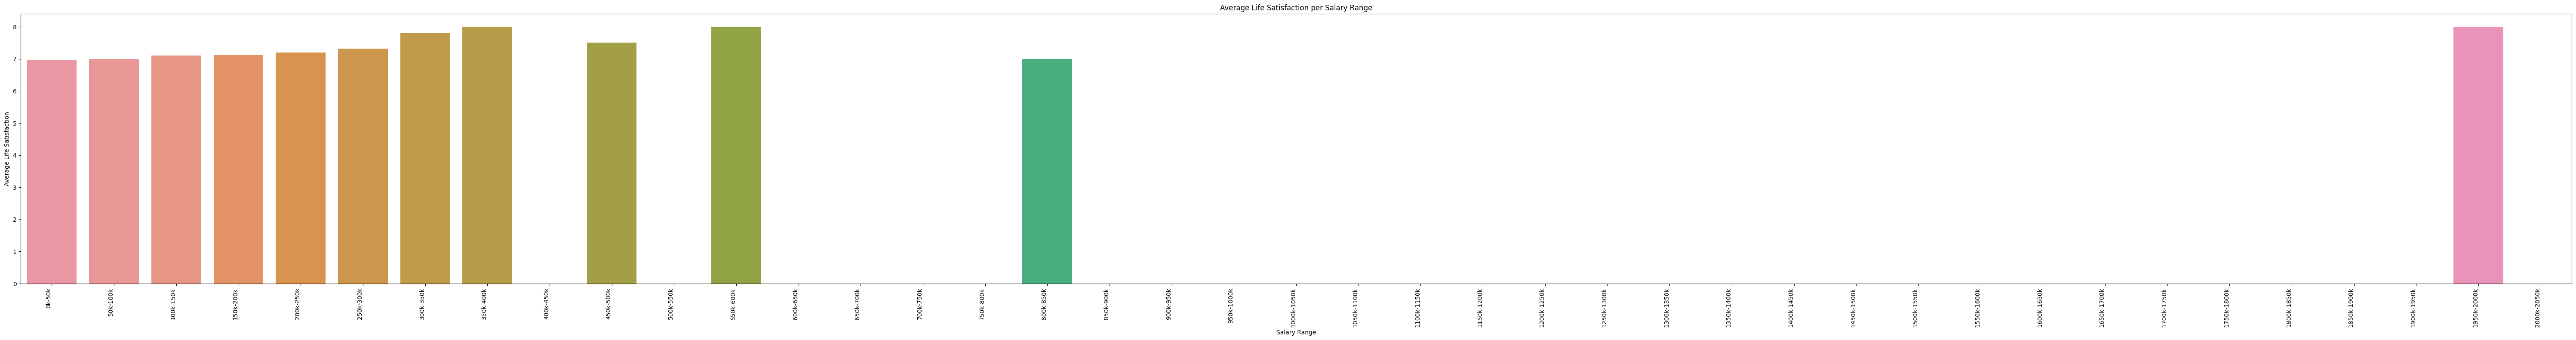

In [47]:
# interesting... less cyclic when binned
#click on image to make it bigger


# try bin_incriments of 1,000 (ticks: 25), 10,000,25,000 (ticks:1),
##50,000 (ticks:1), and 100,000 (ticks: 10)
bin_increments =50000


# Create bins for salaryamnt
bins = pd.interval_range(start=0, end=new_df['salaryamnt'].max() + bin_increments, freq=bin_increments)

# Bin the data and calculate the average life satisfaction for each bin
new_df['salary_bin'] = pd.cut(new_df['salaryamnt'], bins=bins)
average_lifesatis = new_df.groupby("salary_bin")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(60, 8))
sns.barplot(x=[f"{int(interval.left/1000)}k-{int(interval.right/1000)}k" for interval in average_lifesatis.index],
            y=average_lifesatis.values)

plt.xlabel("Salary Range")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Salary Range")

# Show only every 3rd label to reduce clutter
plt.xticks(rotation=90, ha='right')
plt.gca().set_xticks(plt.gca().get_xticks()[::1])

plt.tight_layout()
plt.show()

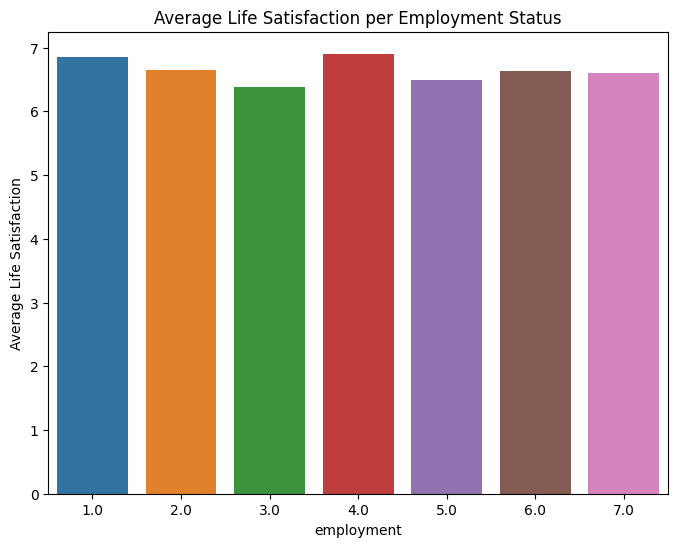

In [48]:
#Graph not interpretable for reader because we do not know the relevence of
# the employment status numbers. but there is enough variablility here to suggest
#employment statuses 1 and 4 contribute most to high lifesatis

# Group by "employmnt" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("employmnt")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("employment")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Employment Status")
plt.show()

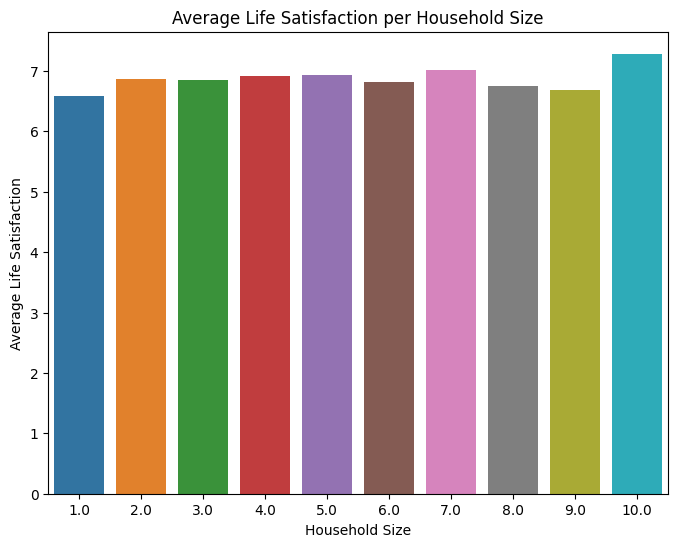

In [49]:
# seems the only average household sizes tomake it to "high" (7) were 7 or 10.
#but there is significantly less data for household sizes 4+ so it could be based
#off of just one or two peoples statement
#living alone does seem to bring the lifesat down a bit and there was plenty
#of data for that

# Group by "hhsize" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("hhsize")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("Household Size")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Household Size")
plt.show()

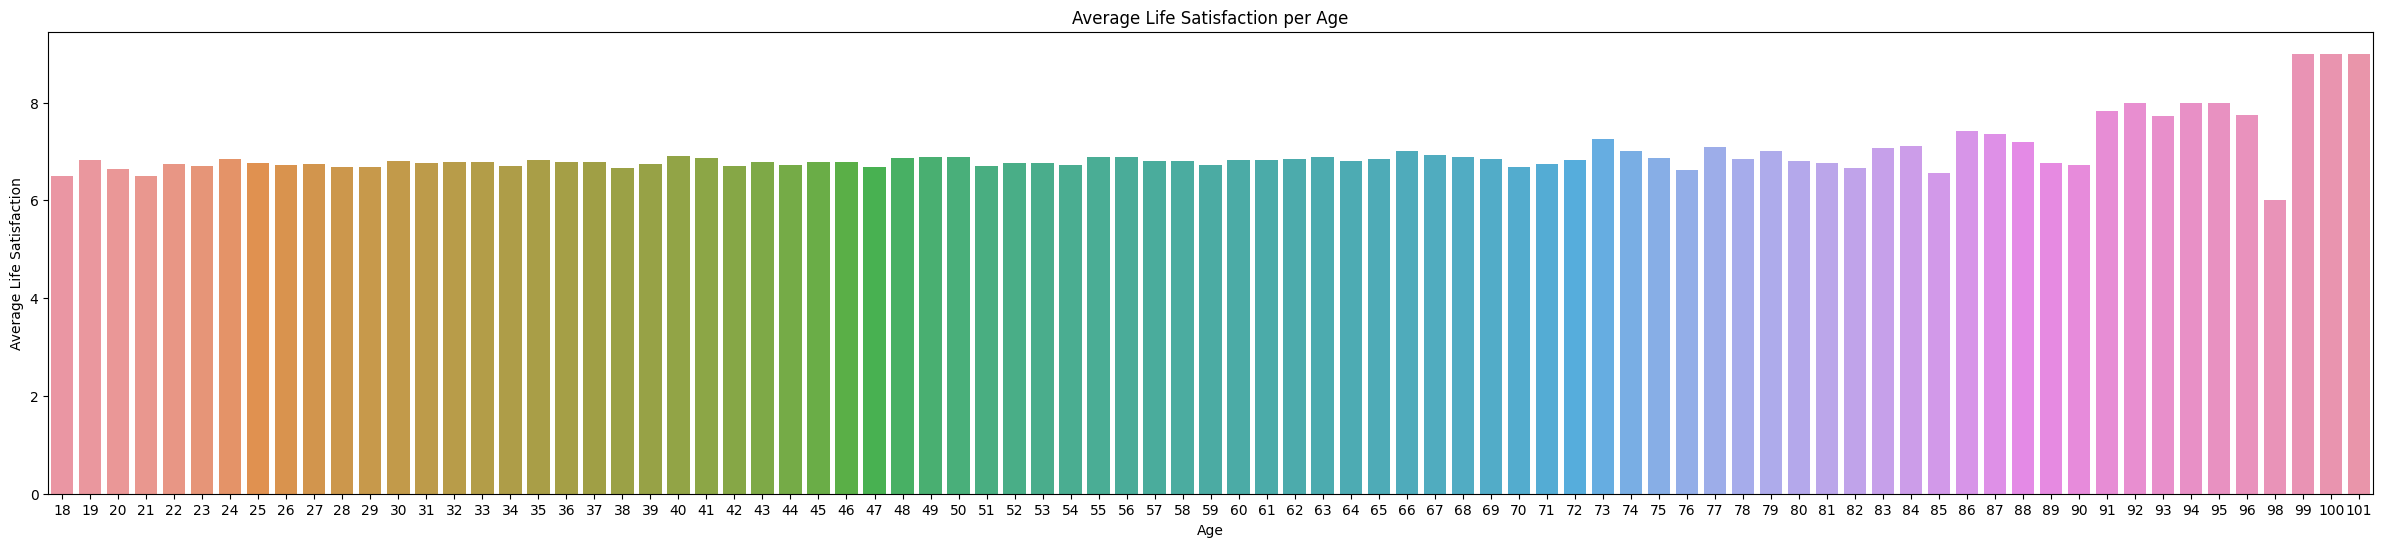

In [50]:
#around 70 a pattern begins where there is general overall lifesatis growth,
#but with an almost pattern of drop around every decade birthday

# Group by "age" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("age")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(30, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("Age")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Age")
plt.show()

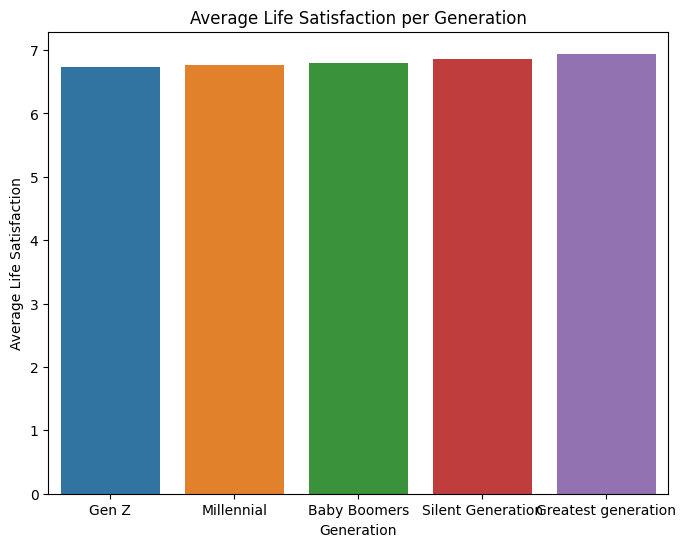

In [51]:
#no average age group reached high life satisfaction
#average but the greatest generation was close

# Group by "generation" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("generation")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("Generation")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction per Generation")
plt.show()

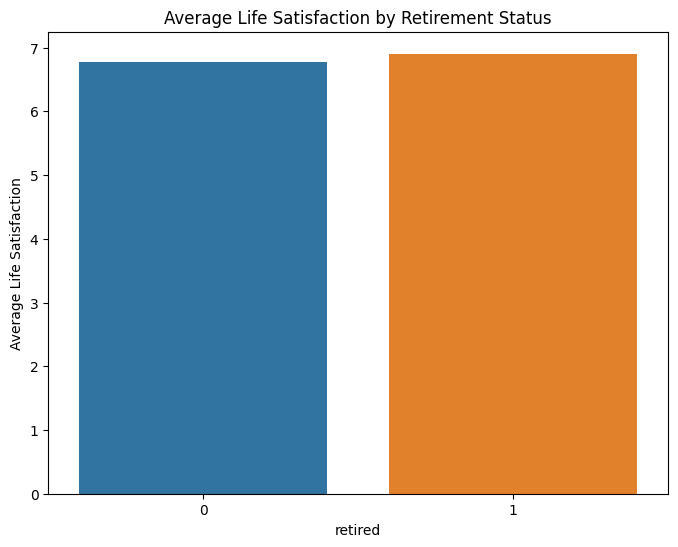

In [52]:
# Group by "retired" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("retired")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("retired")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction by Retirement Status")
plt.show()

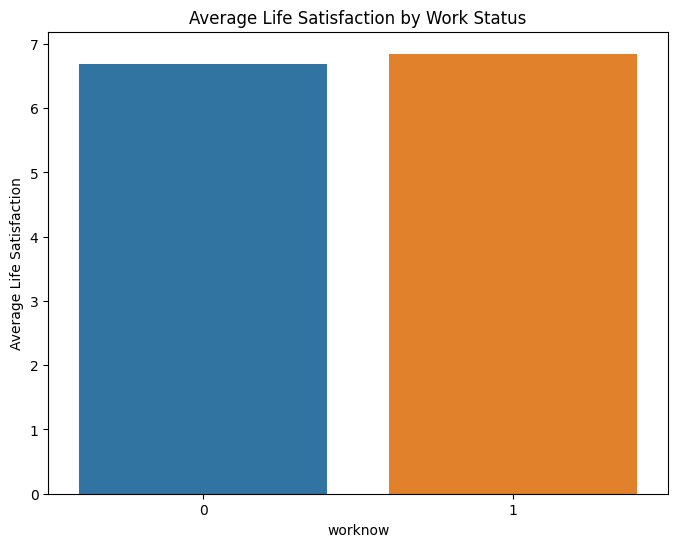

In [53]:
# Group by "worknow" and calculate the average "lifesatis"
average_lifesatis = new_df.groupby("worknow")["lifesatis"].mean()

# Create the histogram using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lifesatis.index, y=average_lifesatis.values)
plt.xlabel("worknow")
plt.ylabel("Average Life Satisfaction")
plt.title("Average Life Satisfaction by Work Status")
plt.show()